## BY- Ayush kumar mishra

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
m1= np.array([0,0,0])
c1= np.array([[1,0,0],[0,1,0],[0,0,1]])
a1= np.random.multivariate_normal(m1,c1,20)
df = pd.DataFrame(a1,columns=['feature1','feature2','feature3'])
df['target'] = 1

m2= np.array([1,1,1])
c2= np.array([[1,0,0],[0,1,0],[0,0,1]])
a2=np.random.multivariate_normal(m2,c2,20)

df2 = pd.DataFrame(a2,columns=['feature1','feature2','feature3'])
df2['target'] = 0

df= pd.concat([df,df2],ignore_index=True)
df = df.sample(40)

In [2]:
df.head()

,feature1,feature2,feature3,target
32,1.296120,1.261055,1.005113,0
36,1.257550,0.925554,-0.918771,0
35,1.404051,2.886186,1.174578,0
22,0.927990,2.003533,1.361636,0
11,-1.057711,0.822545,-1.220844,1


In [3]:
import plotly.express as px
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],color=df['target'].astype('str'))

In [4]:
fig.show()

### Scaling the input to mean=0

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [6]:
df.head()

,feature1,feature2,feature3,target
32,1.128750,0.645755,0.553298,0
36,1.076937,0.372534,-1.043604,0
35,1.273739,1.969207,0.693961,0
22,0.634222,1.250404,0.849227,0
11,-2.033271,0.288647,-1.294336,1


In [7]:
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],color=df['target'].astype('str'))
fig.show()

### Finding covariance matric

In [8]:
cov_matrix = np.cov(df.iloc[:,0:3].T)
cov_matrix 

array([[1.02564103, 0.35175   , 0.07987862],
       [0.35175   , 1.02564103, 0.28328008],
       [0.07987862, 0.28328008, 1.02564103]])

### Now eigenvalues and eigenvectors

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvectors

array([[-0.56014874, -0.62132881,  0.5478904 ],
       [-0.67561935, -0.04005698, -0.73616162],
       [-0.47934526,  0.78252536,  0.3973439 ]])

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

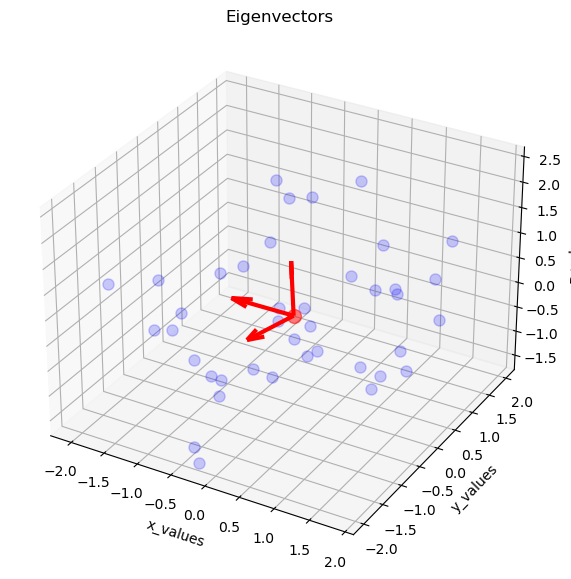

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)

for v in eigenvectors:
    ax.quiver(df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean(), v[0], v[1], v[2], color='r', linewidth=3)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [12]:
npc= eigenvectors[0:2]
npc

array([[-0.56014874, -0.62132881,  0.5478904 ],
       [-0.67561935, -0.04005698, -0.73616162]])

In [13]:
final_df= np.dot(df.iloc[:,0:3],npc.T)
final_df= pd.DataFrame(final_df,columns=['pc1','pc2'])
final_df['target']= df['target']
final_df.head()

,pc1,pc2,target
0,-0.730348,-1.195790,1
1,-1.406492,0.025739,1
2,-1.556794,-1.450310,1
3,-0.666888,-1.103748,1
4,0.250435,2.314996,1


In [14]:
final_df['target']= final_df['target'].astype('str')
fig = px.scatter(final_df, x=final_df['pc1'], y=final_df['pc2'],color=final_df['target'])
fig.show()